In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/data/'
npz_name = 'Incucyte64.npz'
npz_val_name = 'Incucyte64Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteresnetd74.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 74
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 64
imagey = 64

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=74, epochs=250, gridx=1, gridy=1, imagex=64, imagey=64, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=3, model_name='incucyteresnetd74.h5', multievent=False, nboxes=5, npz_directory='/home/sancere/Kepler/Incucyte/data/', npz_name='Incucyte64.npz', npz_val_name='Incucyte64Val.npz', residual=True, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 5176
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
number of  images:	 273
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
(5176, 1, 1, 12) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5176 samples, validate on 273 samples
Epoch 1/250
5176/5176 [==============================] - 44s 9ms/step - loss: 6.6654 - acc: 0.0421 - val_loss: 5.8864 - val_acc: 0.0733

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 5.886395552219489, 'val_acc': 0.07326007394236086, 'loss': 6.665443446573555, 'acc': 0.04211746481242928, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

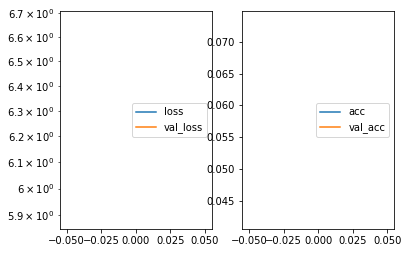

Predicted cell: Normal Probability: [[0.55636305]]
True Cell type: Cells
x [[0.44280905]]
True positional value x 0.5
y [[0.5502323]]
True positional value y 0.65625


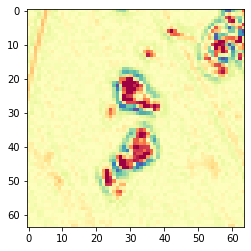

Epoch 2/250
5176/5176 [==============================] - 24s 5ms/step - loss: 5.5000 - acc: 0.0914 - val_loss: 5.1878 - val_acc: 0.1758

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 5.187808782626421, 'val_acc': 0.17582417527834573, 'loss': 5.499992366183486, 'acc': 0.09138330716029432, 'lr': 1e-06}


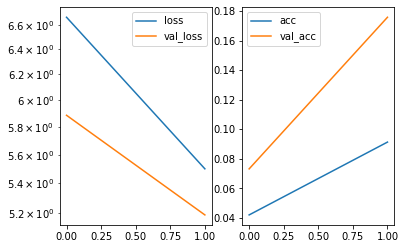

Predicted cell: Cells Probability: [[0.82444316]]
True Cell type: Cells
x [[0.38438475]]
True positional value x 0.5
y [[0.7530957]]
True positional value y 0.65625


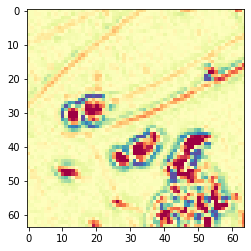

Epoch 3/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.9516 - acc: 0.2784 - val_loss: 4.8379 - val_acc: 0.4469

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.8379076810983515, 'val_acc': 0.44688644524895665, 'loss': 4.951578512073853, 'acc': 0.2784003093665958, 'lr': 1e-06}


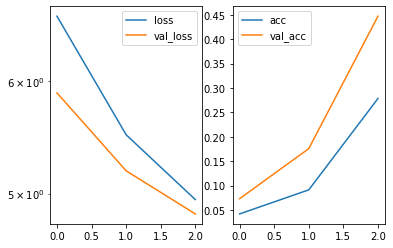

Predicted cell: Cells Probability: [[0.8273342]]
True Cell type: Cells
x [[0.44752222]]
True positional value x 0.5
y [[0.6343912]]
True positional value y 0.65625


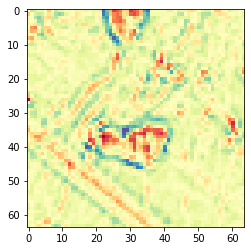

Epoch 4/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.7535 - acc: 0.5168 - val_loss: 4.7396 - val_acc: 0.6337

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.739627495790139, 'val_acc': 0.6336996264946766, 'loss': 4.7535043208639625, 'acc': 0.5168083413537171, 'lr': 1e-06}


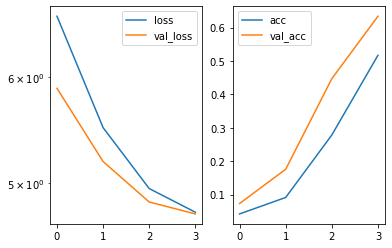

Predicted cell: Cells Probability: [[0.96154547]]
True Cell type: Cells
x [[0.48199993]]
True positional value x 0.34375
y [[0.89979094]]
True positional value y 0.65625


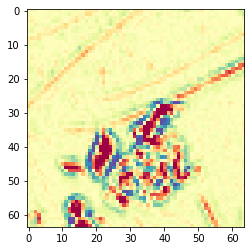

Epoch 5/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.5889 - acc: 0.6866 - val_loss: 4.6593 - val_acc: 0.7326

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.65926221700815, 'val_acc': 0.732600735220717, 'loss': 4.58885086411855, 'acc': 0.6866306026899465, 'lr': 1e-06}


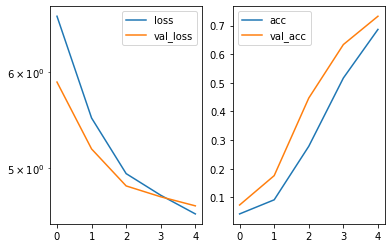

Predicted cell: Cells Probability: [[0.8222167]]
True Cell type: Cells
x [[0.41242987]]
True positional value x 0.65625
y [[0.5382316]]
True positional value y 0.5


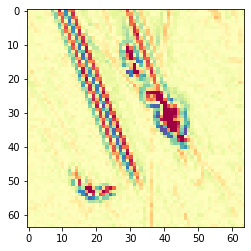

Epoch 6/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.4717 - acc: 0.7939 - val_loss: 4.6440 - val_acc: 0.7656

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.643951924292596, 'val_acc': 0.7655677590178046, 'loss': 4.47171034363359, 'acc': 0.7938562601666547, 'lr': 1e-06}


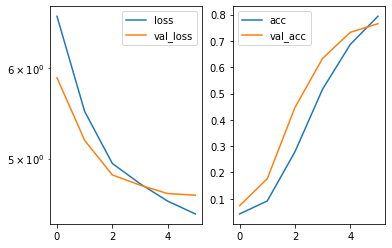

Predicted cell: Cells Probability: [[0.8875491]]
True Cell type: Normal
x [[0.50500965]]
True positional value x 0.5
y [[0.4783904]]
True positional value y 0.5


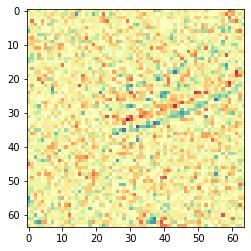

Epoch 7/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.4047 - acc: 0.8379 - val_loss: 4.6398 - val_acc: 0.7802

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.639839210789719, 'val_acc': 0.7802197596965692, 'loss': 4.4046866341020445, 'acc': 0.8379057157997739, 'lr': 1e-06}


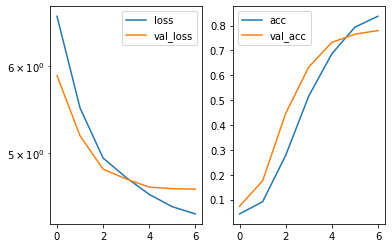

Predicted cell: Cells Probability: [[0.9640909]]
True Cell type: Cells
x [[0.48957556]]
True positional value x 0.34375
y [[0.47927415]]
True positional value y 0.5


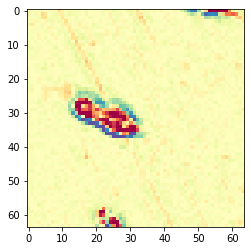

Epoch 8/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.3465 - acc: 0.8549 - val_loss: 4.6145 - val_acc: 0.7875

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.614485693501902, 'val_acc': 0.7875457873274555, 'loss': 4.346542573601607, 'acc': 0.8549072628688222, 'lr': 1e-06}


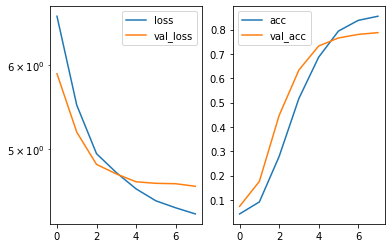

Predicted cell: Cells Probability: [[0.97096616]]
True Cell type: Cells
x [[0.4094677]]
True positional value x 0.34375
y [[0.64841807]]
True positional value y 0.5


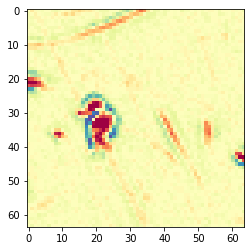

Epoch 9/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.2915 - acc: 0.8563 - val_loss: 4.5909 - val_acc: 0.7839

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.590908574533986, 'val_acc': 0.7838827871577644, 'loss': 4.29150379496343, 'acc': 0.856259656652601, 'lr': 1e-06}


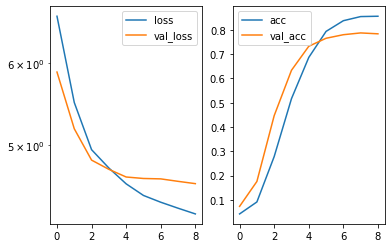

Predicted cell: Cells Probability: [[0.95956165]]
True Cell type: Cells
x [[0.47105825]]
True positional value x 0.5
y [[0.5503914]]
True positional value y 0.65625


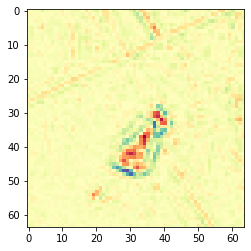

Epoch 10/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.2447 - acc: 0.8580 - val_loss: 4.5680 - val_acc: 0.7839

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.56796600879767, 'val_acc': 0.7838827871577644, 'loss': 4.2447493489042865, 'acc': 0.8579984536218864, 'lr': 1e-06}


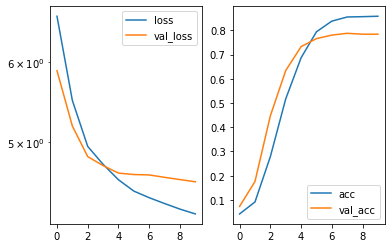

Predicted cell: Cells Probability: [[0.5484001]]
True Cell type: Normal
x [[0.27059948]]
True positional value x 0.5
y [[0.54164743]]
True positional value y 0.5


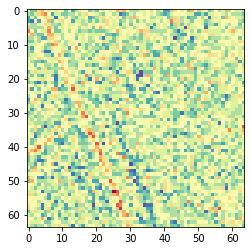

Epoch 11/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.2000 - acc: 0.8580 - val_loss: 4.5522 - val_acc: 0.7766

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.552156273698632, 'val_acc': 0.7765567595268781, 'loss': 4.199999937134143, 'acc': 0.8579984521478922, 'lr': 1e-06}


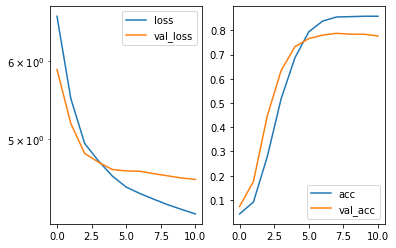

Predicted cell: Cells Probability: [[0.8992268]]
True Cell type: Cells
x [[0.38210234]]
True positional value x 0.34375
y [[0.5337211]]
True positional value y 0.5


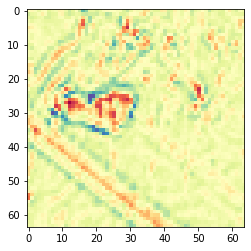

Epoch 12/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.1545 - acc: 0.8580 - val_loss: 4.5324 - val_acc: 0.7766

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.532358607966384, 'val_acc': 0.7765567595268781, 'loss': 4.1544882727922205, 'acc': 0.8579984495223397, 'lr': 1e-06}


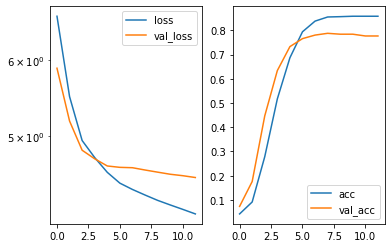

Predicted cell: Cells Probability: [[0.9130371]]
True Cell type: Cells
x [[0.4839689]]
True positional value x 0.65625
y [[0.667611]]
True positional value y 0.5


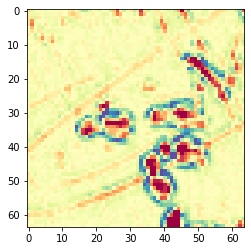

Epoch 13/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.1139 - acc: 0.8601 - val_loss: 4.5216 - val_acc: 0.7729

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.521580049843142, 'val_acc': 0.7728937916703277, 'loss': 4.113899157994313, 'acc': 0.8601236491704466, 'lr': 1e-06}


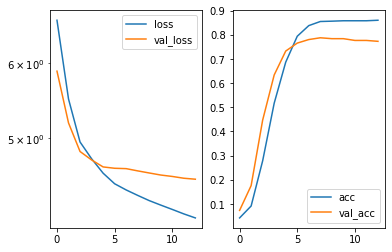

Predicted cell: Cells Probability: [[0.8870241]]
True Cell type: Normal
x [[0.38753685]]
True positional value x 0.5
y [[0.59961605]]
True positional value y 0.5


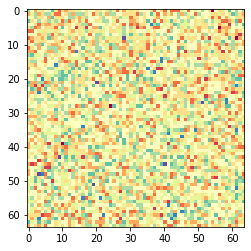

Epoch 14/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.0774 - acc: 0.8576 - val_loss: 4.5043 - val_acc: 0.7692

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.504252386617137, 'val_acc': 0.7692307696674333, 'loss': 4.077449662239511, 'acc': 0.8576120558256712, 'lr': 1e-06}


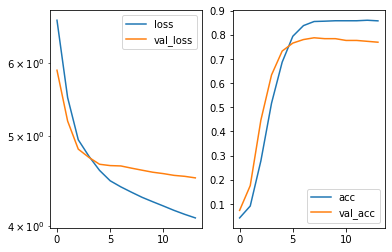

Predicted cell: Cells Probability: [[0.9580804]]
True Cell type: Cells
x [[0.45401162]]
True positional value x 0.34375
y [[0.44199866]]
True positional value y 0.34375


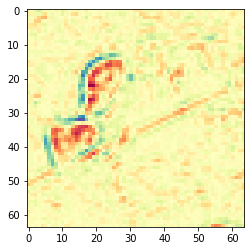

Epoch 15/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.0466 - acc: 0.8586 - val_loss: 4.4897 - val_acc: 0.7692

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.489749312837482, 'val_acc': 0.7692307696674333, 'loss': 4.046572586299831, 'acc': 0.8585780568340278, 'lr': 1e-06}


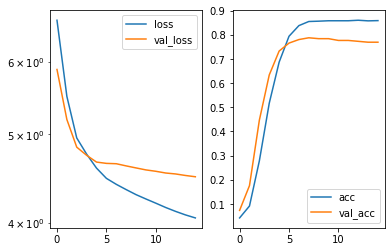

Predicted cell: Cells Probability: [[0.692987]]
True Cell type: Normal
x [[0.528526]]
True positional value x 0.5
y [[0.57410115]]
True positional value y 0.5


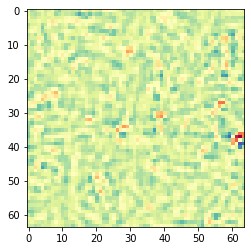

Epoch 16/250
5176/5176 [==============================] - 25s 5ms/step - loss: 4.0142 - acc: 0.8543 - val_loss: 4.4784 - val_acc: 0.7692

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.478374896905361, 'val_acc': 0.7692307696674333, 'loss': 4.014248751599048, 'acc': 0.8543276698825164, 'lr': 1e-06}


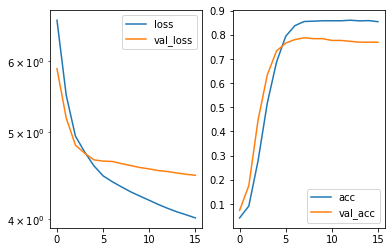

Predicted cell: Cells Probability: [[0.9811968]]
True Cell type: Cells
x [[0.5789549]]
True positional value x 0.65625
y [[0.36104155]]
True positional value y 0.34375


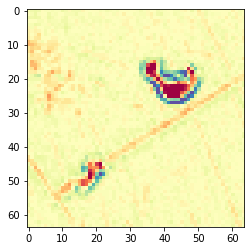

Epoch 17/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.9809 - acc: 0.8541 - val_loss: 4.4692 - val_acc: 0.7656

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.469231982807536, 'val_acc': 0.7655677694977422, 'loss': 3.980948517458885, 'acc': 0.8541344664933324, 'lr': 1e-06}


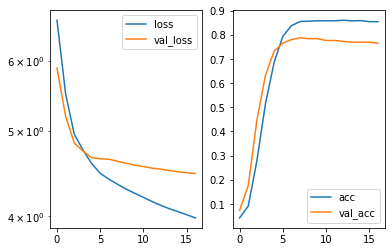

Predicted cell: Cells Probability: [[0.9403941]]
True Cell type: Cells
x [[0.70037735]]
True positional value x 0.65625
y [[0.7177434]]
True positional value y 0.65625


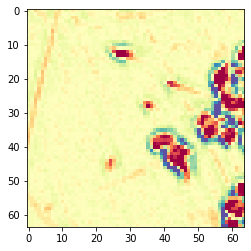

Epoch 18/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.9514 - acc: 0.8516 - val_loss: 4.4615 - val_acc: 0.7656

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.461520008115104, 'val_acc': 0.7655677694977422, 'loss': 3.9513754640148817, 'acc': 0.8516228727800584, 'lr': 1e-06}


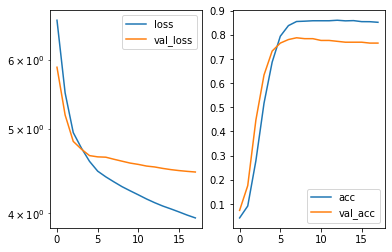

Predicted cell: Cells Probability: [[0.9583354]]
True Cell type: Cells
x [[0.63904774]]
True positional value x 0.65625
y [[0.32064772]]
True positional value y 0.34375


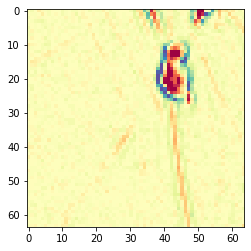

Epoch 19/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.9249 - acc: 0.8522 - val_loss: 4.4545 - val_acc: 0.7656

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.454525077735985, 'val_acc': 0.7655677694977422, 'loss': 3.924879427855313, 'acc': 0.8522024705568458, 'lr': 1e-06}


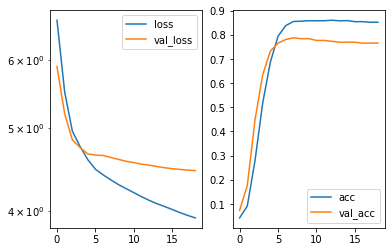

Predicted cell: Cells Probability: [[0.9266763]]
True Cell type: Cells
x [[0.40808707]]
True positional value x 0.34375
y [[0.5052871]]
True positional value y 0.65625


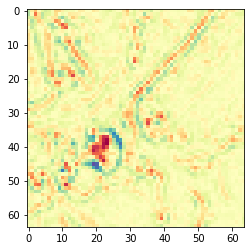

Epoch 20/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.9013 - acc: 0.8536 - val_loss: 4.4453 - val_acc: 0.7656

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.445259899446816, 'val_acc': 0.7655677694977422, 'loss': 3.9013028303290813, 'acc': 0.8535548664134289, 'lr': 1e-06}


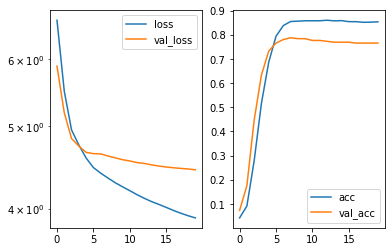

Predicted cell: Cells Probability: [[0.8954508]]
True Cell type: Cells
x [[0.6078836]]
True positional value x 0.65625
y [[0.6152242]]
True positional value y 0.65625


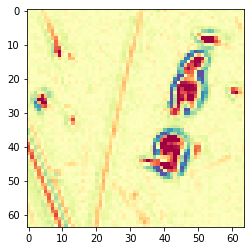

Epoch 21/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.8763 - acc: 0.8545 - val_loss: 4.4389 - val_acc: 0.7656

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.438923393850361, 'val_acc': 0.7655677694977422, 'loss': 3.876271911529706, 'acc': 0.8545208632301142, 'lr': 1e-06}


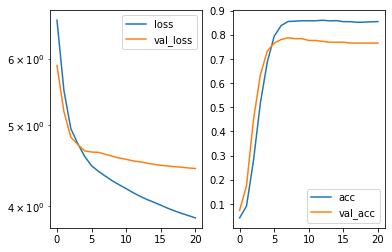

Predicted cell: Cells Probability: [[0.9633114]]
True Cell type: Normal
x [[0.5903278]]
True positional value x 0.5
y [[0.39033496]]
True positional value y 0.5


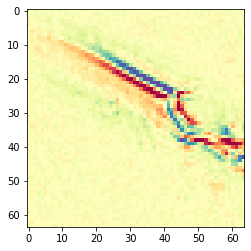

Epoch 22/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.8572 - acc: 0.8557 - val_loss: 4.4310 - val_acc: 0.7656

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.431020895640056, 'val_acc': 0.7655677694977422, 'loss': 3.8572124646288533, 'acc': 0.8556800603037455, 'lr': 1e-06}


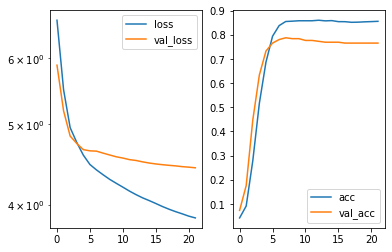

Predicted cell: Cells Probability: [[0.9620622]]
True Cell type: Cells
x [[0.6089686]]
True positional value x 0.65625
y [[0.54522157]]
True positional value y 0.5


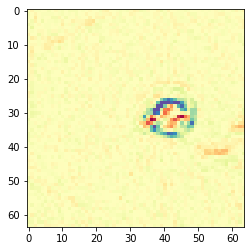

Epoch 23/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.8337 - acc: 0.8565 - val_loss: 4.4240 - val_acc: 0.7656

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.4240462910998, 'val_acc': 0.7655677694977422, 'loss': 3.833727631723678, 'acc': 0.8564528584296036, 'lr': 1e-06}


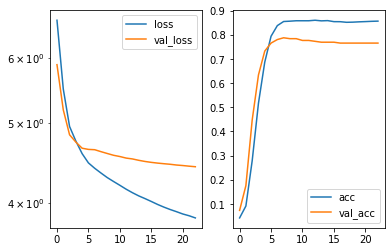

Predicted cell: Cells Probability: [[0.94220877]]
True Cell type: Cells
x [[0.31237203]]
True positional value x 0.34375
y [[0.48776525]]
True positional value y 0.65625


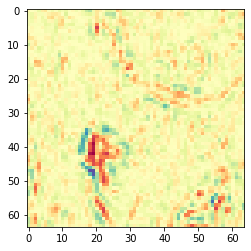

Epoch 24/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.8097 - acc: 0.8572 - val_loss: 4.4204 - val_acc: 0.7692

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.420425774850251, 'val_acc': 0.7692307915006366, 'loss': 3.809697024236322, 'acc': 0.8572256584900793, 'lr': 1e-06}


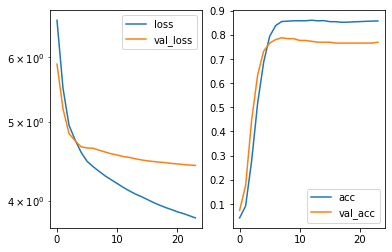

Predicted cell: Cells Probability: [[0.872112]]
True Cell type: Cells
x [[0.66555345]]
True positional value x 0.65625
y [[0.59201145]]
True positional value y 0.65625


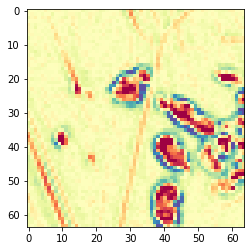

Epoch 25/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.7946 - acc: 0.8578 - val_loss: 4.4125 - val_acc: 0.7656

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.412543902903686, 'val_acc': 0.7655677694977422, 'loss': 3.7946411315956294, 'acc': 0.8578052555759318, 'lr': 1e-06}


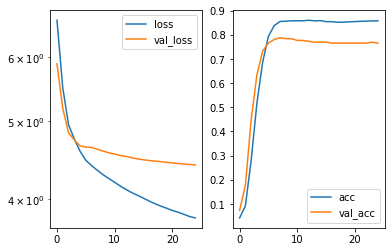

Predicted cell: Cells Probability: [[0.98159087]]
True Cell type: Cells
x [[0.36609727]]
True positional value x 0.34375
y [[0.25757205]]
True positional value y 0.34375


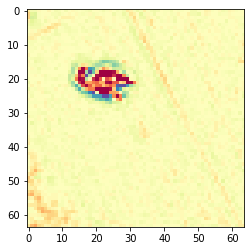

Epoch 26/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.7711 - acc: 0.8601 - val_loss: 4.4055 - val_acc: 0.7656

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.405485347077087, 'val_acc': 0.7655677694977422, 'loss': 3.7711093932436275, 'acc': 0.860123645946084, 'lr': 1e-06}


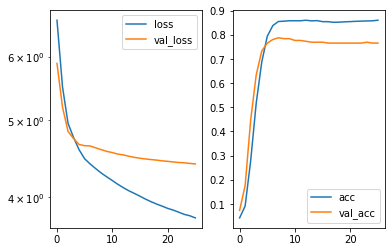

Predicted cell: Cells Probability: [[0.869265]]
True Cell type: Cells
x [[0.6300764]]
True positional value x 0.65625
y [[0.3319211]]
True positional value y 0.34375


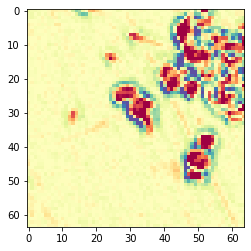

Epoch 27/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.7552 - acc: 0.8595 - val_loss: 4.3992 - val_acc: 0.7619

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.399229074135805, 'val_acc': 0.761904769328051, 'loss': 3.7552271095641427, 'acc': 0.8595440496893534, 'lr': 1e-06}


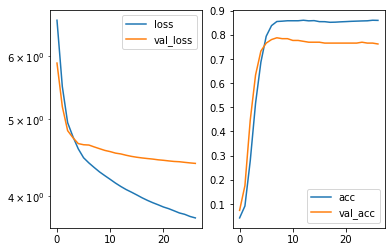

Predicted cell: Cells Probability: [[0.9168558]]
True Cell type: Cells
x [[0.5598687]]
True positional value x 0.65625
y [[0.36544853]]
True positional value y 0.65625


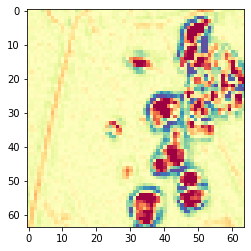

Epoch 28/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.7367 - acc: 0.8603 - val_loss: 4.3939 - val_acc: 0.7766

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.393944155165564, 'val_acc': 0.7765567595268781, 'loss': 3.7366811269217703, 'acc': 0.8603168475388375, 'lr': 1e-06}


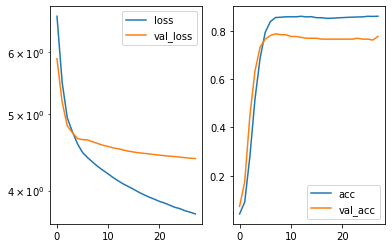

Predicted cell: Cells Probability: [[0.971961]]
True Cell type: Cells
x [[0.4159913]]
True positional value x 0.34375
y [[0.46197587]]
True positional value y 0.34375


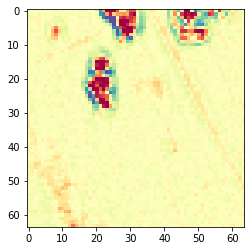

Epoch 29/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.7143 - acc: 0.8609 - val_loss: 4.3893 - val_acc: 0.7766

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.389317750057458, 'val_acc': 0.7765567595268781, 'loss': 3.7142790782580604, 'acc': 0.8608964458683728, 'lr': 1e-06}


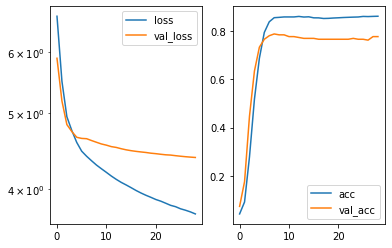

Predicted cell: Cells Probability: [[0.9698573]]
True Cell type: Cells
x [[0.61513156]]
True positional value x 0.5
y [[0.6956221]]
True positional value y 0.65625


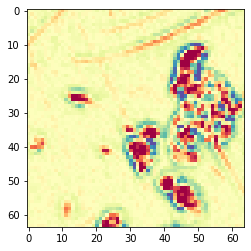

Epoch 30/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.7029 - acc: 0.8619 - val_loss: 4.3864 - val_acc: 0.7766

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.3863749119824975, 'val_acc': 0.7765567595268781, 'loss': 3.702915611923017, 'acc': 0.8618624420862478, 'lr': 1e-06}


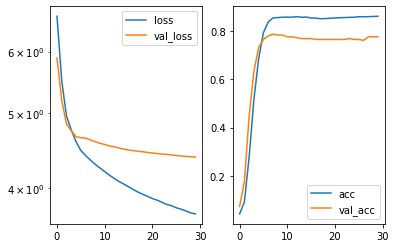

Predicted cell: Cells Probability: [[0.80865383]]
True Cell type: Normal
x [[0.5176616]]
True positional value x 0.5
y [[0.48396978]]
True positional value y 0.5


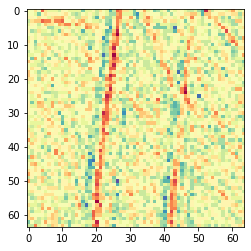

Epoch 31/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.6871 - acc: 0.8626 - val_loss: 4.3816 - val_acc: 0.7766

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.381556849776607, 'val_acc': 0.7765567595268781, 'loss': 3.6871100966307626, 'acc': 0.8626352398896696, 'lr': 1e-06}


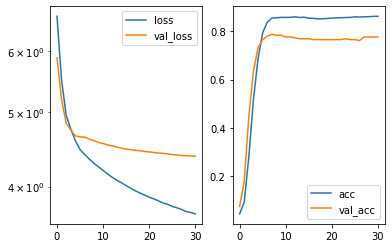

Predicted cell: Cells Probability: [[0.98775804]]
True Cell type: Cells
x [[0.53575265]]
True positional value x 0.65625
y [[0.52381265]]
True positional value y 0.5


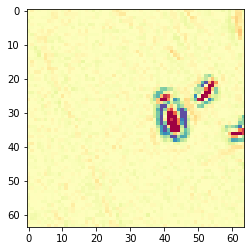

Epoch 32/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.6701 - acc: 0.8638 - val_loss: 4.3770 - val_acc: 0.7802

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.377005638220371, 'val_acc': 0.7802197596965692, 'loss': 3.6700558837451376, 'acc': 0.8637944347523095, 'lr': 1e-06}


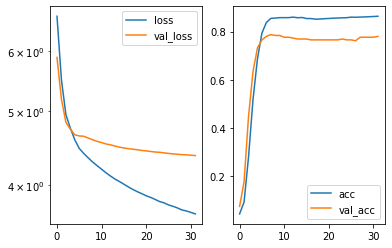

Predicted cell: Cells Probability: [[0.97549903]]
True Cell type: Cells
x [[0.5722711]]
True positional value x 0.5
y [[0.47856298]]
True positional value y 0.5


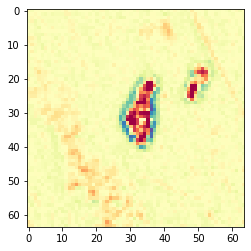

Epoch 33/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.6539 - acc: 0.8628 - val_loss: 4.3723 - val_acc: 0.7766

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.372281287615989, 'val_acc': 0.7765567595268781, 'loss': 3.6539018165199244, 'acc': 0.862828439179307, 'lr': 1e-06}


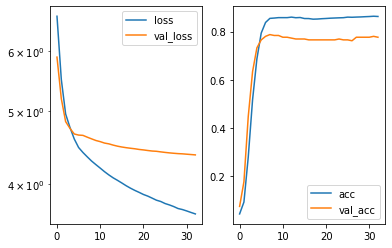

Predicted cell: Cells Probability: [[0.8649496]]
True Cell type: Cells
x [[0.540959]]
True positional value x 0.5
y [[0.37724197]]
True positional value y 0.34375


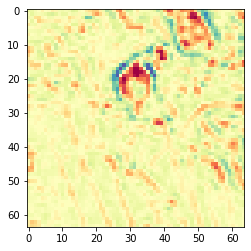

Epoch 34/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.6436 - acc: 0.8673 - val_loss: 4.3671 - val_acc: 0.7802

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.367107132852296, 'val_acc': 0.7802197596965692, 'loss': 3.6435791410655476, 'acc': 0.8672720264798891, 'lr': 1e-06}


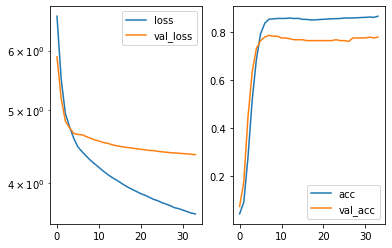

Predicted cell: Cells Probability: [[0.9564983]]
True Cell type: Cells
x [[0.2986023]]
True positional value x 0.34375
y [[0.5007194]]
True positional value y 0.5


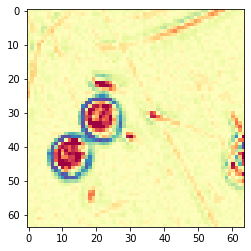

Epoch 35/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.6262 - acc: 0.8642 - val_loss: 4.3640 - val_acc: 0.7766

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.363956921266549, 'val_acc': 0.7765567595268781, 'loss': 3.6261518053146196, 'acc': 0.8641808325485247, 'lr': 1e-06}


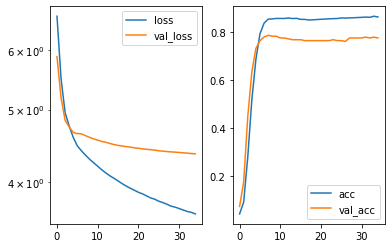

Predicted cell: Cells Probability: [[0.9742726]]
True Cell type: Cells
x [[0.2884754]]
True positional value x 0.34375
y [[0.6825095]]
True positional value y 0.65625


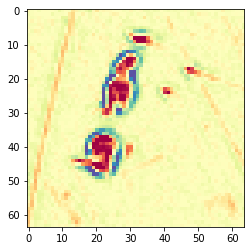

Epoch 36/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.6160 - acc: 0.8663 - val_loss: 4.3597 - val_acc: 0.7802

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.359748471787561, 'val_acc': 0.7802197596965692, 'loss': 3.61600031900627, 'acc': 0.866306027682524, 'lr': 1e-06}


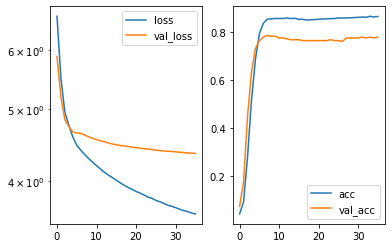

Predicted cell: Cells Probability: [[0.96026236]]
True Cell type: Cells
x [[0.46474916]]
True positional value x 0.34375
y [[0.4550981]]
True positional value y 0.34375


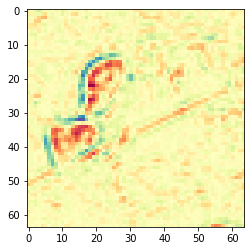

Epoch 37/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.6062 - acc: 0.8669 - val_loss: 4.3579 - val_acc: 0.7839

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.357904278751695, 'val_acc': 0.7838827816994636, 'loss': 3.6062321856364585, 'acc': 0.8668856229719459, 'lr': 1e-06}


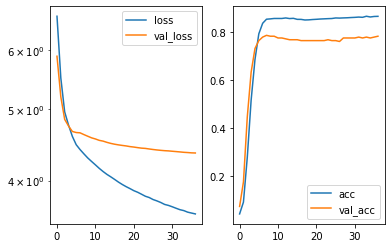

Predicted cell: Cells Probability: [[0.85592777]]
True Cell type: Cells
x [[0.5084363]]
True positional value x 0.5
y [[0.7018677]]
True positional value y 0.5


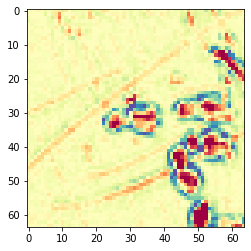

Epoch 38/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5905 - acc: 0.8682 - val_loss: 4.3536 - val_acc: 0.7912

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.353550862043332, 'val_acc': 0.7912087656639435, 'loss': 3.590465528334864, 'acc': 0.8682380223753279, 'lr': 1e-06}


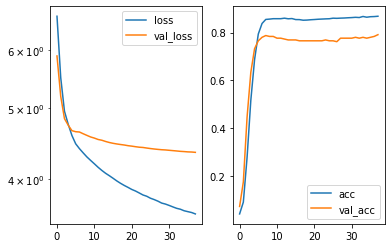

Predicted cell: Cells Probability: [[0.9751379]]
True Cell type: Cells
x [[0.34305328]]
True positional value x 0.34375
y [[0.28487456]]
True positional value y 0.34375


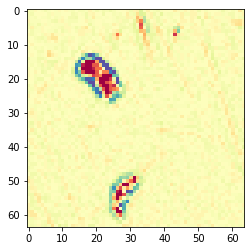

Epoch 39/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5791 - acc: 0.8682 - val_loss: 4.3509 - val_acc: 0.7949

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.3509460071941, 'val_acc': 0.794871782208537, 'loss': 3.5791473069920605, 'acc': 0.8682380191509653, 'lr': 1e-06}


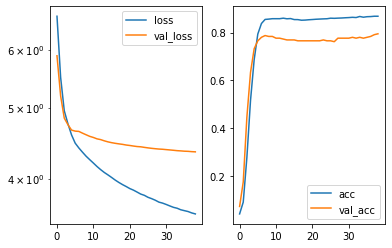

Predicted cell: Cells Probability: [[0.8934656]]
True Cell type: Cells
x [[0.3221385]]
True positional value x 0.34375
y [[0.5236803]]
True positional value y 0.34375


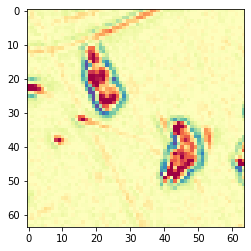

Epoch 40/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5676 - acc: 0.8713 - val_loss: 4.3473 - val_acc: 0.7949

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.347287431304708, 'val_acc': 0.7948717876668379, 'loss': 3.5676498381763557, 'acc': 0.8713292140496385, 'lr': 1e-06}


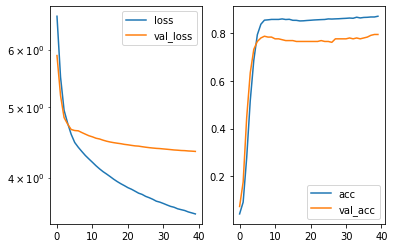

Predicted cell: Cells Probability: [[0.90303975]]
True Cell type: Cells
x [[0.49870843]]
True positional value x 0.5
y [[0.37876534]]
True positional value y 0.34375


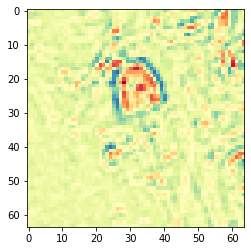

Epoch 41/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5574 - acc: 0.8704 - val_loss: 4.3445 - val_acc: 0.7985

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.344480823684525, 'val_acc': 0.798534787836529, 'loss': 3.557422014255612, 'acc': 0.8703632146995256, 'lr': 1e-06}


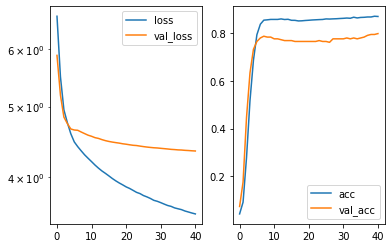

Predicted cell: Cells Probability: [[0.8393439]]
True Cell type: Cells
x [[0.5893598]]
True positional value x 0.65625
y [[0.30782348]]
True positional value y 0.34375


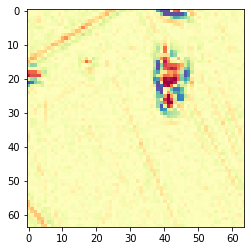

Epoch 42/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5476 - acc: 0.8692 - val_loss: 4.3418 - val_acc: 0.7985

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.341807220445011, 'val_acc': 0.798534787836529, 'loss': 3.547592226651942, 'acc': 0.8692040160597753, 'lr': 1e-06}


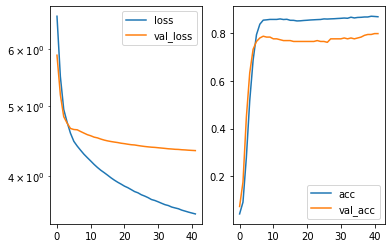

Predicted cell: Cells Probability: [[0.88794035]]
True Cell type: Normal
x [[0.48139608]]
True positional value x 0.5
y [[0.45890367]]
True positional value y 0.5


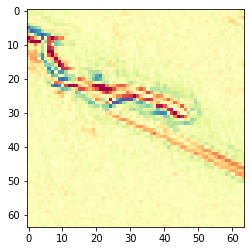

Epoch 43/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5382 - acc: 0.8729 - val_loss: 4.3380 - val_acc: 0.7985

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.338026914841089, 'val_acc': 0.798534787836529, 'loss': 3.5381646182105935, 'acc': 0.8728748056490602, 'lr': 1e-06}


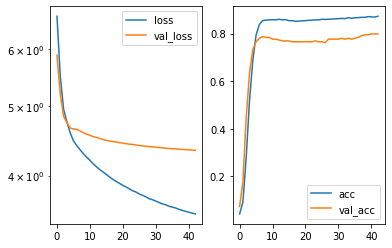

Predicted cell: Cells Probability: [[0.7638631]]
True Cell type: Cells
x [[0.4992091]]
True positional value x 0.5
y [[0.529506]]
True positional value y 0.5


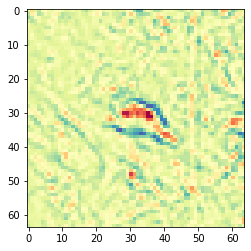

Epoch 44/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5267 - acc: 0.8754 - val_loss: 4.3364 - val_acc: 0.7985

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.3364171125949955, 'val_acc': 0.798534787836529, 'loss': 3.526663183797456, 'acc': 0.8753864003296429, 'lr': 1e-06}


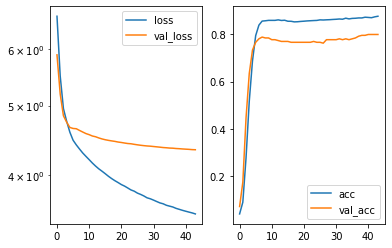

Predicted cell: Cells Probability: [[0.86860675]]
True Cell type: Cells
x [[0.67023206]]
True positional value x 0.65625
y [[0.5297339]]
True positional value y 0.5


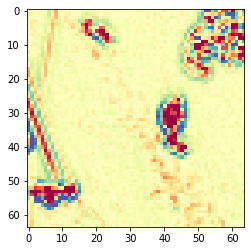

Epoch 45/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5153 - acc: 0.8729 - val_loss: 4.3340 - val_acc: 0.7985

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.334022600572188, 'val_acc': 0.798534787836529, 'loss': 3.515326169027243, 'acc': 0.8728748073994285, 'lr': 1e-06}


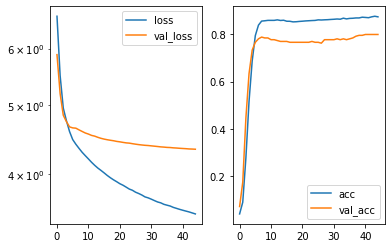

Predicted cell: Cells Probability: [[0.58116704]]
True Cell type: Normal
x [[0.4222442]]
True positional value x 0.5
y [[0.6256571]]
True positional value y 0.5


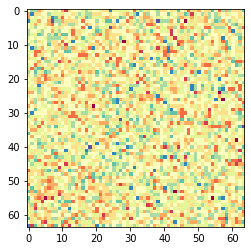

Epoch 46/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5088 - acc: 0.8744 - val_loss: 4.3312 - val_acc: 0.7949

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.331158037150736, 'val_acc': 0.7948717876668379, 'loss': 3.508822364269121, 'acc': 0.8744204004728444, 'lr': 1e-06}


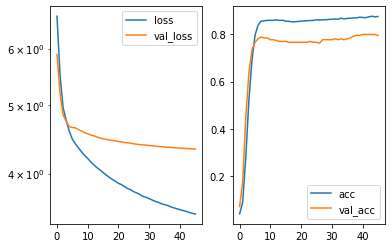

Predicted cell: Cells Probability: [[0.9800632]]
True Cell type: Cells
x [[0.5155293]]
True positional value x 0.5
y [[0.47835886]]
True positional value y 0.5


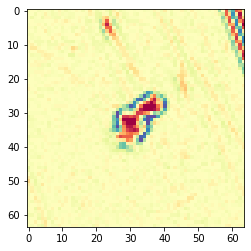

Epoch 47/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.5027 - acc: 0.8756 - val_loss: 4.3276 - val_acc: 0.7949

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.327612185216212, 'val_acc': 0.7948717876668379, 'loss': 3.5027066863485983, 'acc': 0.8755795944142378, 'lr': 1e-06}


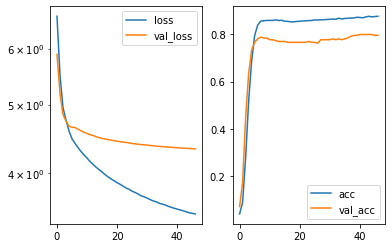

Predicted cell: Cells Probability: [[0.95949656]]
True Cell type: Cells
x [[0.4622746]]
True positional value x 0.34375
y [[0.34134686]]
True positional value y 0.34375


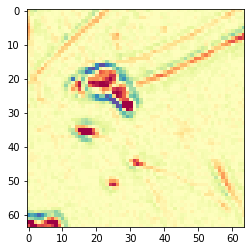

Epoch 48/250
5176/5176 [==============================] - 25s 5ms/step - loss: 3.4906 - acc: 0.8769 - val_loss: 4.3255 - val_acc: 0.7949

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd74.h5
{'val_loss': 4.325506444379087, 'val_acc': 0.7948717876668379, 'loss': 3.4905571546952543, 'acc': 0.8769319900405094, 'lr': 1e-06}


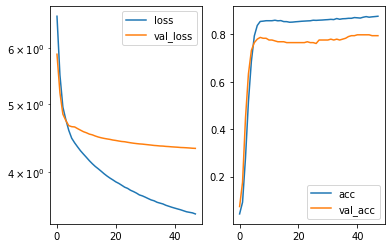

Predicted cell: Cells Probability: [[0.79993254]]
True Cell type: Cells
x [[0.44859096]]
True positional value x 0.34375
y [[0.5309638]]
True positional value y 0.5


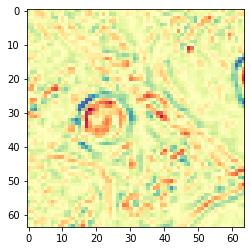

Epoch 49/250
 700/5176 [===>..........................] - ETA: 21s - loss: 3.5317 - acc: 0.8500

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
